In [7]:
from keras.datasets import mnist,fashion_mnist
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data() #De esta forma ya vamos a tener separado el dataset en train y test respectivamente.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
print("X_train shape:", X_train_raw.shape)
print('y_train shape:', y_train.shape)
print("X_test shape:", X_test_raw.shape)
print('y_test shape:', y_test.shape)
print('X_train_raw dtype:', X_train_raw.dtype)
print('y_train_raw dtype:', y_train.dtype)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train_raw dtype: uint8
y_train_raw dtype: uint8


In [11]:
y_train = y_train.astype('float') #cambiamos uint 8 a float
X_train_raw = X_train_raw.astype('float')

TypeError: list indices must be integers or slices, not numpy.float64

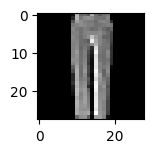

In [12]:
fig = plt.figure(figsize=(8,8))
for i in range(25):
    j = np.random.randint(0, len(X_train_raw))
    plt.subplot(5,5,i+1)
    plt.imshow(X_train_raw[j], interpolation='none', cmap='gray')
    plt.title("clase: {}".format(categories[y_train[j]]), fontsize= 10)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [13]:
X_train_raw[0].shape

(28, 28)

In [14]:
print("Los valores de cada elemento de X_train_raw van entre", np.min(X_train_raw), "y", np.max(X_train_raw))

Los valores de cada elemento de X_train_raw van entre 0.0 y 255.0


In [15]:
X_train = X_train_raw.reshape(60000, -1)
X_test = X_test_raw.reshape(10000, -1)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

In [18]:
print('Matriz de entrenamiento shape', X_train.shape)
print('Matriz de testeo shape', X_test.shape)

Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


In [20]:
values, counts = np.unique(y_train, return_counts=True)
print("X_train")
print('Values:', values)
print('Counts:', counts)
print('y_test')
value,counts = np.unique(y_test, return_counts=True)
print('Values:', values)
print('Counts:', counts)

X_train
Values: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Counts: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
y_test
Values: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Counts: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
encoder = OneHotEncoder(sparse=False)

In [23]:
encoder.fit(y_train.reshape(-1,1))

OneHotEncoder(sparse=False)

In [24]:
print("Categoria encoder:", encoder.categories_)

Categoria encoder: [array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])]


In [25]:
Y_train = encoder.transform(y_train.reshape(-1,1))

In [26]:
print("Como queda la matriz Y_train: \n:", Y_train)

Como queda la matriz Y_train: 
: [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
print("y_train shape [antes de one_hot encoding]: ", y_train.shape)
print("Y_train shape [Despues de one-hot encoding]: ", Y_train.shape)

y_train shape [antes de one_hot encoding]:  (60000,)
Y_train shape [Despues de one-hot encoding]:  (60000, 10)


## Lo mismo para el test

In [28]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(y_test.reshape(-1,1))
Y_test = encoder.transform(y_test.reshape(-1,1))

In [29]:
print("y_test shape [antes de one_hot encoding]: ", y_test.shape)
print("Y_test shape [Despues de one-hot encoding]: ", Y_test.shape)

y_test shape [antes de one_hot encoding]:  (10000,)
Y_test shape [Despues de one-hot encoding]:  (10000, 10)


## Creacion de Red neuronal Basica

In [30]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.metrics as metrics

#Importamos Keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, plot_model
from keras.regularizers import l1

In [31]:
#Definimos el modelo secuencial(primero esta vacio)
model_simple = Sequential()

#agregamos una capa de 10 perceptrones con activación logistica(softmax)
model_simple.add(Dense(10,activation='softmax'))
#Dense() crea una capa de 10 nodos(perceptrones) que esta fully connected, es decir todas las entradas obtienen un peso para todos los nodos
#por lo que la cantidaad de pesos en este caso seria 784x10(784 pesos, uno por cada entrada del vector input para cada uno de los perceptrones)

In [32]:
model_simple.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')

In [33]:
history = model_simple.fit(X_train, Y_train,
                batch_size=32, epochs=10,
                verbose=1,
                validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5999 - categorical_accuracy: 0.7963 - val_loss: 0.5116 - val_categorical_accuracy: 0.8214
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4610 - categorical_accuracy: 0.8426 - val_loss: 0.4770 - val_categorical_accuracy: 0.8353
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4362 - categorical_accuracy: 0.8491 - val_loss: 0.4633 - val_categorical_accuracy: 0.8372
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4219 - categorical_accuracy: 0.8548 - val_loss: 0.4611 - val_categorical_accuracy: 0.8409
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4133 - categorical_accuracy: 0.8575 - val_loss: 0.4787 - val_categorical_accuracy: 0.8321
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4072 - categorical_accuracy: 0.8593 - val_loss: 0.4465 - val_categorical_accuracy:

In [34]:
salida = model_simple.predict(X_test[0:1]) #analogo al .predict.proba() que de sklearn

print('Shape de la salida:', salida.shape)
print('Salida:', salida)

1/1 [==============================] - 0s 212ms/step
Shape de la salida: (1, 10)
Salida: [[6.3978302e-07 3.7793505e-08 1.6863267e-05 4.9498590e-06 8.2633596e-06
  1.6132006e-01 2.6013560e-05 4.5266625e-02 8.7972451e-03 7.8455931e-01]]


In [35]:
etiqueta_prediccion = salida[0].argmax()
etiqueta_real = y_test[0]

print('Calse asignada por la red:', etiqueta_prediccion)
print('Calse real:', etiqueta_real)

Calse asignada por la red: 9
Calse real: 9


In [36]:
#Usamos el modelo para predecir sobre todas als instancias en ambos sets
y_train_pred = model_simple.predict(X_train)
y_test_pred = model_simple.predict(X_test)

#Tomamos como clase predicha aquella con mayor probabilidad
train_acurracy = metrics.accuracy_score(y_train_pred.argmax(axis=1), y_train)
#y_train_pred.argmax(axis=1) es un vector de longitud igual a la longitud de y_train_pred
#pero en cada elemento tiene el número de clase con mayor probabilidad en vez de un vector con las 10 probabilidades
test_accuracy = metrics.accuracy_score(y_test_pred.argmax(axis=1), y_test)

print('Accuracy en el train set:', train_acurracy)
print('Accuracy en el test set:', test_accuracy)

313/313 [==============================] - 1s 3ms/step
Accuracy en el train set: 0.8677333333333334
Accuracy en el test set: 0.8447


#### Veamos como es la matriz de confusion para casos con mas de una clase

In [37]:
from sklearn.metrics import confusion_matrix

print("Matriz de Confusion")
print(confusion_matrix(y_test, y_test_pred.argmax(axis=1)))

Matriz de Confusion
[[783   4  14  60   7   0 118   0  14   0]
 [  3 965   2  21   5   0   2   0   2   0]
 [ 18   7 758  10 142   1  55   0   9   0]
 [ 15  17  17 870  35   0  41   0   5   0]
 [  0   1 116  36 789   0  50   0   8   0]
 [  0   0   0   1   0 946   0  30   4  19]
 [110   2 156  40 145   0 525   0  22   0]
 [  0   0   0   0   0  55   0 903   0  42]
 [  4   1  10  10   3   4  13   4 951   0]
 [  0   0   0   0   0  17   1  25   0 957]]


In [38]:
weights = model_simple.get_weights()[0]
print(weights.shape)

(784, 10)


In [40]:
#Que esta mirando la red? 
weights = model_simple.get_weights()[0]
print(weights.shape)

(784, 10)


##### Cada una de las 10 neuronas(una por cada clase) tiene 784 pesos, uno por cada pixel de imagen(sin contar los bins). La lectura del vector numerico de pesos no sera muy informativa. pero veamosque pasa si lo llevamos a (28,28) y lo graficamos en una imagen

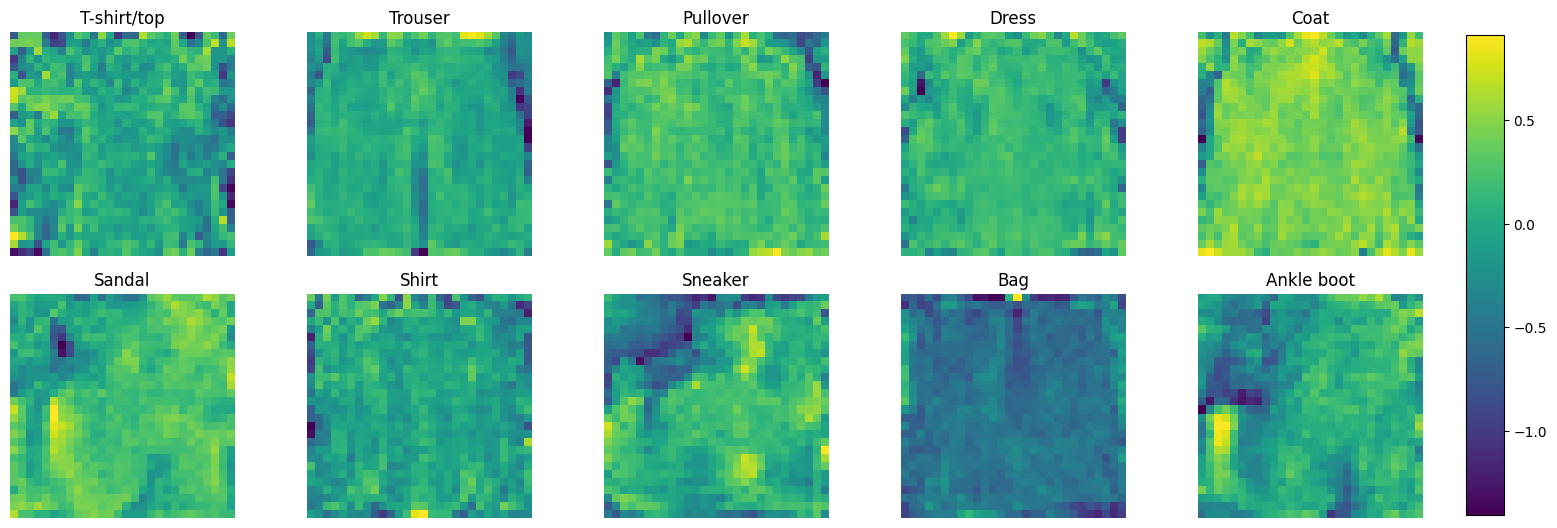

In [43]:
plt.figure(figsize = (15,8)) #seteo tamaño de figura
for i in range(10): # i va desde 0 a 9 (range(10)) es un vector que empieza de 0 y termina en 10-1 = 9 con steps de 1
    plt.subplot(3,5,i+1) # hago subplots en 2 filas y 5 columnas
    w0 = weights[:,i] # accedo a la matriz de pesos del perceptron i-esimo correspondiente a la clase i-esima
    plt.title(categories[i]) #imprimo la categoria i-esima correspondiente al i-esimo perceptron
    plt.imshow(w0.reshape(28,28)) #reshapeo el vector de pesos i-esimo(784,) a (28,28) para recuperar el formato de las imagenes
    plt.axis('off')
plt.tight_layout()
cax = plt.axes([1, 0.35, 0.025, 0.6])
plt.colorbar(cax=cax)
plt.show()
plt.show()